In [2]:
import pandas as pd
import joblib

def add_features(df):
    df = df.copy()
    df["age_group"] = pd.cut(
        df["age"],
        bins=[0, 30, 40, 120],
        labels=[0, 1, 2]
    ).astype(int)
    return df

In [3]:
model = joblib.load("over_30_model.joblib")

In [4]:
new_people = pd.DataFrame({
    "age": [22, 35, 47, 31],
    "city": ["Miami", "Boston", "Austin", "Miami"]
})

new_people = add_features(new_people)
new_people

,age,city,age_group
0,22,Miami,0
1,35,Boston,1
2,47,Austin,2
3,31,Miami,1


In [6]:
probs = model.predict_proba(new_people)
probs

array([[9.99738521e-01, 2.61479240e-04],
       [1.06677296e-01, 8.93322704e-01],
       [6.15469649e-06, 9.99993845e-01],
       [7.25347677e-01, 2.74652323e-01]])

In [7]:
for i, person in new_people.iterrows():
    print(
        f"age={person['age']}, city={person['city']} → "
        f"{probs[i][1]:.4f}"
    )

age=22, city=Miami → 0.0003
age=35, city=Boston → 0.8933
age=47, city=Austin → 1.0000
age=31, city=Miami → 0.2747


In [8]:
import matplotlib.pyplot as plt

In [9]:
labels = [
    f"{row['city']} (age {row['age']})"
    for _, row in new_people.iterrows()
]

over_30_probs = probs[:, 1]  # probability of class = 1

In [10]:
labels

['Miami (age 22)', 'Boston (age 35)', 'Austin (age 47)', 'Miami (age 31)']

In [11]:
over_30_probs

array([2.61479240e-04, 8.93322704e-01, 9.99993845e-01, 2.74652323e-01])

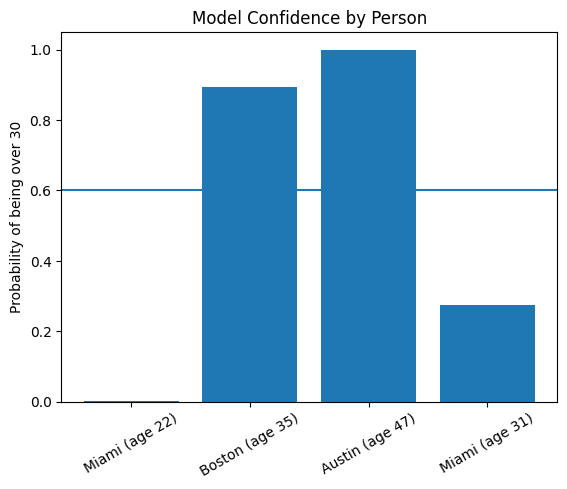

In [12]:
plt.figure()
plt.bar(labels, over_30_probs)
plt.axhline(0.6)
plt.ylabel("Probability of being over 30")
plt.title("Model Confidence by Person")
plt.xticks(rotation=30)
plt.show()

# Over-30 Prediction Mini-Project

## Goal
Train a simple machine learning model that predicts whether a person is over 30
based on age and city.

## Workflow
1. Load CSV data
2. Engineer features (age groups)
3. Train a logistic regression model
4. Save the trained model
5. Predict probabilities for new data
6. Visualize model confidence

## Key Concepts Demonstrated
- Feature engineering
- Probabilistic predictions
- Threshold control
- Model persistence
- Jupyter for exploration

## Tools Used
- Python
- pandas
- scikit-learn
- matplotlib
- Jupyter Notebook

## Why this matters
This project demonstrates a complete applied ML pipeline:
data → features → model → probabilities → decisions.